In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sm
import scikit_posthocs as sp
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot
%matplotlib inline

/Users/leven/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Replace zero values with the mean

In [6]:
df['Glucose'] = df['Glucose'].replace(0, int(df['Glucose'].mean()))
df['BloodPressure'] = df['BloodPressure'].replace(0, int(df['BloodPressure'].mean()))
df['SkinThickness'] = df['SkinThickness'].replace(0, int(df['SkinThickness'].mean()))
df['Insulin'] = df['Insulin'].replace(0, int(df['Insulin'].mean()))
df['BMI'] = df['BMI'].replace(0, round(df['BMI'].mean(), 1))

In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.675781      72.250000      26.447917  118.270833   
std       3.369578   30.436252      12.117203       9.733872   93.243829   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.000000   79.000000   
50%       3.000000  117.000000      72.000000      23.000000   79.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
df.dtypes 
# only BMI and DiabetesPedigreeFunction are floats, others are all integer

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

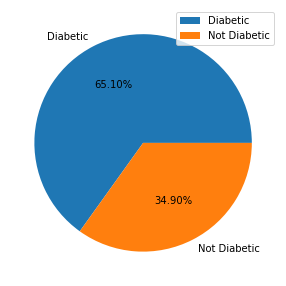

In [9]:
plt.figure(figsize=(5,5))
labels= 'Diabetic','Not Diabetic'
plt.pie(df['Outcome'].value_counts(),labels=labels,autopct='%0.02f%%')
plt.legend()
plt.show()

# Categorize BMI

In [10]:
df['BMI'].describe()

count    768.000000
mean      32.450911
std        6.875366
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [11]:
bmi = pd.cut(df.BMI,bins=[0, 24.9, 67.1],labels=['normal','high'])
df.insert(6,'BMI_cat', bmi)

In [12]:
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI BMI_cat  \
0            6      148             72             35       79  33.6    high   
1            1       85             66             29       79  26.6    high   
2            8      183             64             20       79  23.3  normal   
3            1       89             66             23       94  28.1    high   
4            0      137             40             35      168  43.1    high   
5            5      116             74             20       79  25.6    high   
6            3       78             50             32       88  31.0    high   
7           10      115             69             20       79  35.3    high   
8            2      197             70             45      543  30.5    high   
9            8      125             96             20       79  32.0    high   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

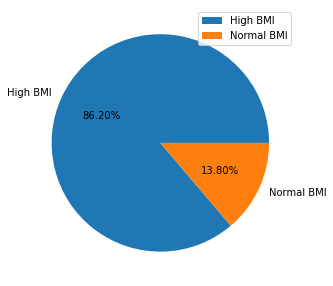

In [13]:
plt.figure(figsize=(5,5))
labels= 'High BMI','Normal BMI'
plt.pie(df['BMI_cat'].value_counts(),labels=labels,autopct='%0.02f%%')
plt.legend()
plt.show()

# Correlation matrix for numeric values

In [14]:
df_numeric = df.drop(columns=['Outcome'])
corr_matrix = df_numeric.corr()
print(corr_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128022       0.208987       0.009393   
Glucose                      0.128022  1.000000       0.219765       0.158060   
BloodPressure                0.208987  0.219765       1.000000       0.130403   
SkinThickness                0.009393  0.158060       0.130403       1.000000   
Insulin                     -0.018780  0.396137       0.010492       0.245410   
BMI                          0.021546  0.231455       0.281223       0.532543   
DiabetesPedigreeFunction    -0.033523  0.137158       0.000471       0.157196   
Age                          0.544341  0.266673       0.326791       0.020582   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.018780  0.021546                 -0.033523   
Glucose                   0.396137  0.231455                  0.137158   
BloodPressure             0.010492  0.281223    

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, vmax=1, square=True, cmap="Blues")
plt.title('Correlation Heatmap')
plt.show()

Age and Pregnancies have a relatively strong correlation, 0.54, which is easy to understand because more pregnancies require more time. The correlation here is obvious so I will not research on this pair.
Instead, I will choose to look at the relationship between BMI and SkinThickness, which has a correlation of 0.53. 

# Violin Plot for numeric values

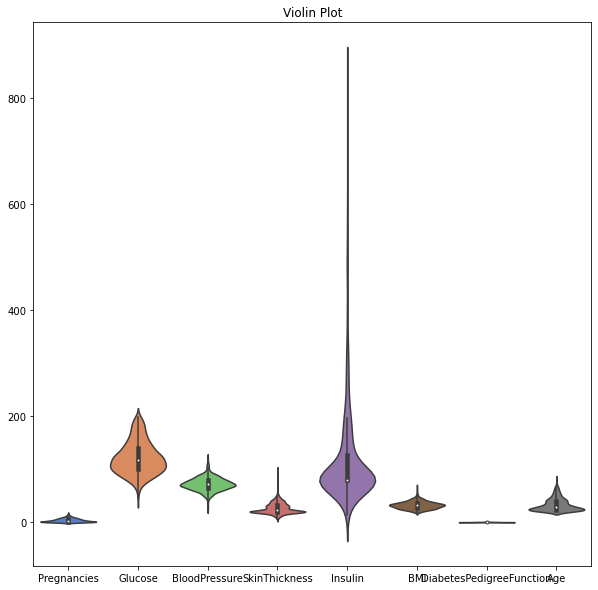

In [16]:
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=df_numeric, palette="muted", scale="width")
plt.title('Violin Plot')
plt.show()

# Scatter Plot for BMI and SkinThickness

<AxesSubplot:xlabel='BMI', ylabel='SkinThickness'>

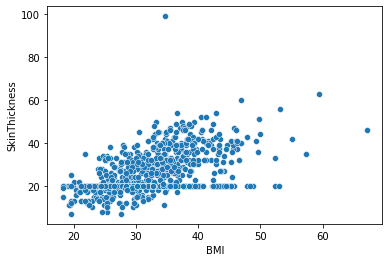

In [17]:
sns.scatterplot(x='BMI', y='SkinThickness', data = df)

# Research Question

Do people with a high BMI and people with a normal BMI have different skin thickness?

In [18]:
df.groupby('BMI_cat')['SkinThickness'].mean()

BMI_cat
normal    18.584906
high      27.706949
Name: SkinThickness, dtype: float64

In [19]:
lm = ols('SkinThickness ~ BMI_cat', data = df).fit()

In [20]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SkinThickness   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     89.50
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           3.66e-20
Time:                        01:02:41   Log-Likelihood:                -2794.5
No. Observations:                 768   AIC:                             5593.
Df Residuals:                     766   BIC:                             5602.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          18.5849      0.895     20.761      0.000      16.828      20.342
BMI_cat[T.high]     9.1220      0.964      9.461      0.000       7.229      11.015
==============================================================================
Omnibus:                      206.337   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              801.497
Skew:                           1.213   Prob(JB):                    9.06e-175
Kurtosis:                       7.378   Cond. No.                         5.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Paired t-test with equal variance
- H0: µ1 = µ2 
- Ha: µ1 ≠ µ2 

In [21]:
high_bmi = df[df['BMI'] > 24.9]['SkinThickness']
low_bmi = df[df['BMI'] <= 24.9]['SkinThickness']

In [22]:
tStat, pValue = stats.ttest_rel(high_bmi[:50], low_bmi[:50]) 
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) 

P-Value:2.087934765488864e-09 T-Statistic:7.3245152330695245


P-value is <0.00001, result is significant at p<0.01
Therefore, we can reject the null hypothesis that there is no difference between means of skin thickness for people with a normal BMI and people with a high BMI. 

<AxesSubplot:title={'center':'SkinThickness'}, xlabel='BMI_cat'>

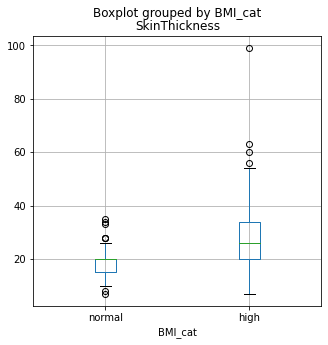

In [23]:
df.boxplot('SkinThickness', by='BMI_cat', figsize=(5, 5))

In [24]:
import pingouin as pg

In [25]:
aov = pg.anova(data=df, dv='SkinThickness', between='BMI_cat', detailed=True)
print(aov)

    Source            SS   DF           MS          F         p-unc       np2
0  BMI_cat   7603.032781    1  7603.032781  89.503965  3.662219e-20  0.104621
1   Within  65068.883885  766    84.946324        NaN           NaN       NaN


/Users/leven/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [26]:
#pairwise comparisons
pt = pg.pairwise_tukey(dv='SkinThickness', between='BMI_cat', effsize = 'cohen', data=df)
print(pt)

        A     B    mean(A)    mean(B)      diff        se         T  p-tukey  \
0  normal  high  18.584906  27.706949 -9.122043  0.964209 -9.460654    0.001   

      cohen  
0 -0.989737  


# Multiple linear regression and ANOVA
Which predictors contribute to skin thickness for people with a normal BMI or a high BMI significantly?

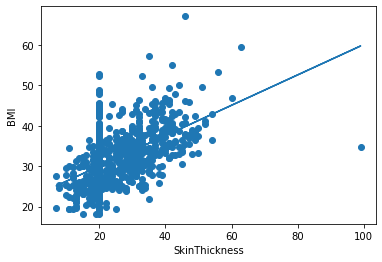

In [27]:
from sklearn.linear_model import LinearRegression

x = df['SkinThickness'].values.reshape(-1,1)
y = df['BMI']

lr_model = LinearRegression()
lr_model.fit(x, y)
y_pred = lr_model.predict(x)

plt.scatter(x, y)
plt.xlabel('SkinThickness')
plt.ylabel('BMI')

plt.plot(x, y_pred)

In [28]:
theta_0 = lr_model.intercept_
theta_1 = lr_model.coef_
theta_0, theta_1

(22.502438438363974, array([0.37615337]))

In [29]:
lm = sfa.ols(formula='SkinThickness ~  Pregnancies', data = df[df['BMI'] > 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5423
Date:                Sun, 27 Mar 2022   Prob (F-statistic):              0.462
Time:                        01:02:45   Log-Likelihood:                -2445.6
No. Observations:                 662   AIC:                             4895.
Df Residuals:                     660   BIC:                             4904.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      28.0301      0.580     48.348      

In [30]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                df        sum_sq    mean_sq         F    PR(>F)
Pregnancies    1.0     51.508457  51.508457  0.542267  0.461757
Residual     660.0  62691.639579  94.987333       NaN       NaN


In [31]:
lm = sfa.ols(formula='SkinThickness ~  Pregnancies', data = df[df['BMI'] <= 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.870
Date:                Sun, 27 Mar 2022   Prob (F-statistic):              0.174
Time:                        01:02:45   Log-Likelihood:                -313.15
No. Observations:                 106   AIC:                             630.3
Df Residuals:                     104   BIC:                             635.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      17.9232      0.664     26.978      

In [32]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                df       sum_sq    mean_sq         F    PR(>F)
Pregnancies    1.0    41.086540  41.086540  1.870309  0.174388
Residual     104.0  2284.649309  21.967782       NaN       NaN


In [33]:
lm = sfa.ols(formula='SkinThickness ~  Glucose', data = df[df['BMI'] > 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     8.821
Date:                Sun, 27 Mar 2022   Prob (F-statistic):            0.00309
Time:                        01:02:45   Log-Likelihood:                -2441.5
No. Observations:                 662   AIC:                             4887.
Df Residuals:                     660   BIC:                             4896.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.2029      1.563     14.849      0.0

In [34]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

             df        sum_sq     mean_sq         F    PR(>F)
Glucose     1.0    827.497213  827.497213  8.820842  0.003086
Residual  660.0  61915.650823   93.811592       NaN       NaN


In [35]:
lm = sfa.ols(formula='SkinThickness ~  Glucose', data = df[df['BMI'] <= 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2214
Date:                Sun, 27 Mar 2022   Prob (F-statistic):              0.639
Time:                        01:02:45   Log-Likelihood:                -313.98
No. Observations:                 106   AIC:                             632.0
Df Residuals:                     104   BIC:                             637.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.6362      2.068      8.530      0.0

In [36]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

             df       sum_sq    mean_sq         F    PR(>F)
Glucose     1.0     4.941335   4.941335  0.221432  0.638936
Residual  104.0  2320.794514  22.315332       NaN       NaN


In [37]:
lm = sfa.ols(formula='SkinThickness ~  BloodPressure', data = df[df['BMI'] > 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     6.741
Date:                Sun, 27 Mar 2022   Prob (F-statistic):            0.00963
Time:                        01:02:45   Log-Likelihood:                -2442.5
No. Observations:                 662   AIC:                             4889.
Df Residuals:                     660   BIC:                             4898.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        21.7109      2.340      9.278

In [38]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                  df        sum_sq     mean_sq         F    PR(>F)
BloodPressure    1.0    634.310392  634.310392  6.740504  0.009635
Residual       660.0  62108.837645   94.104299       NaN       NaN


In [39]:
lm = sfa.ols(formula='SkinThickness ~  BloodPressure', data = df[df['BMI'] <= 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                 1.621e-07
Date:                Sun, 27 Mar 2022   Prob (F-statistic):               1.00
Time:                        01:02:45   Log-Likelihood:                -314.09
No. Observations:                 106   AIC:                             632.2
Df Residuals:                     104   BIC:                             637.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        18.5839      2.539      7.319

In [40]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                  df       sum_sq    mean_sq             F   PR(>F)
BloodPressure    1.0     0.000004   0.000004  1.620991e-07  0.99968
Residual       104.0  2325.735845  22.362845           NaN      NaN


In [41]:
lm = sfa.ols(formula='SkinThickness ~  Insulin', data = df[df['BMI'] > 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     36.93
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           2.07e-09
Time:                        01:02:45   Log-Likelihood:                -2427.9
No. Observations:                 662   AIC:                             4860.
Df Residuals:                     660   BIC:                             4869.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.8759      0.594     41.866      0.0

In [42]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

             df        sum_sq      mean_sq        F        PR(>F)
Insulin     1.0   3324.398060  3324.398060  36.9261  2.073877e-09
Residual  660.0  59418.749976    90.028409      NaN           NaN


In [43]:
lm = sfa.ols(formula='SkinThickness ~  Insulin', data = df[df['BMI'] <= 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.4671
Date:                Sun, 27 Mar 2022   Prob (F-statistic):              0.496
Time:                        01:02:45   Log-Likelihood:                -313.85
No. Observations:                 106   AIC:                             631.7
Df Residuals:                     104   BIC:                             637.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1145      0.900     21.232      0.0

In [44]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

             df       sum_sq    mean_sq         F    PR(>F)
Insulin     1.0    10.399623  10.399623  0.467129  0.495831
Residual  104.0  2315.336226  22.262848       NaN       NaN


In [45]:
lm = sfa.ols(formula='SkinThickness ~  DiabetesPedigreeFunction', data = df[df['BMI'] > 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     14.55
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           0.000150
Time:                        01:02:46   Log-Likelihood:                -2438.7
No. Observations:                 662   AIC:                             4881.
Df Residuals:                     660   BIC:                             4890.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [46]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                             df        sum_sq      mean_sq          F   PR(>F)
DiabetesPedigreeFunction    1.0   1352.958354  1352.958354  14.545525  0.00015
Residual                  660.0  61390.189682    93.015439        NaN      NaN


In [47]:
lm = sfa.ols(formula='SkinThickness ~  DiabetesPedigreeFunction', data = df[df['BMI'] <= 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4245
Date:                Sun, 27 Mar 2022   Prob (F-statistic):              0.516
Time:                        01:02:46   Log-Likelihood:                -313.87
No. Observations:                 106   AIC:                             631.7
Df Residuals:                     104   BIC:                             637.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [48]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                             df       sum_sq    mean_sq         F    PR(>F)
DiabetesPedigreeFunction    1.0     9.454033   9.454033  0.424482  0.516146
Residual                  104.0  2316.281817  22.271941       NaN       NaN


In [49]:
lm = sfa.ols(formula='SkinThickness ~  Age', data = df[df['BMI'] > 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.02541
Date:                Sun, 27 Mar 2022   Prob (F-statistic):              0.873
Time:                        01:02:46   Log-Likelihood:                -2445.9
No. Observations:                 662   AIC:                             4896.
Df Residuals:                     660   BIC:                             4905.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.8828      1.167     23.901      0.0

In [50]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

             df        sum_sq    mean_sq         F    PR(>F)
Age         1.0      2.415265   2.415265  0.025407  0.873405
Residual  660.0  62740.732772  95.061716       NaN       NaN


In [51]:
lm = sfa.ols(formula='SkinThickness ~  Age', data = df[df['BMI'] <= 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.139
Date:                Sun, 27 Mar 2022   Prob (F-statistic):              0.288
Time:                        01:02:46   Log-Likelihood:                -313.51
No. Observations:                 106   AIC:                             631.0
Df Residuals:                     104   BIC:                             636.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.4057      1.196     14.559      0.0

In [52]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

             df       sum_sq    mean_sq         F    PR(>F)
Age         1.0    25.198450  25.198450  1.139142  0.288305
Residual  104.0  2300.537399  22.120552       NaN       NaN


By examining regression results above, we can find that:



For people with a high BMI, factors that have a P-value < 0.05 are:
- Glucose 
- BloodPressure 
- Insulin 
- DiabetesPedigreeFunction

For people with a normal BMI, no factors have a P-value < 0.05.

We can then conduct a multiple regression to see how these factors affect the skin thickness for people with a high BMI. 

In [53]:
lm = sfa.ols(formula='SkinThickness ~  Glucose * BloodPressure', data = df[df['BMI'] > 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     4.678
Date:                Sun, 27 Mar 2022   Prob (F-statistic):            0.00305
Time:                        01:02:46   Log-Likelihood:                -2438.9
No. Observations:                 662   AIC:                             4886.
Df Residuals:                     658   BIC:                             4904.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                10.04

In [54]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                          df        sum_sq     mean_sq         F    PR(>F)
Glucose                  1.0    827.497213  827.497213  8.863214  0.003017
BloodPressure            1.0    397.558995  397.558995  4.258202  0.039453
Glucose:BloodPressure    1.0     85.169583   85.169583  0.912240  0.339871
Residual               658.0  61432.922245   93.363104       NaN       NaN


In [55]:
lm = sfa.ols(formula='SkinThickness ~  Glucose * Insulin', data = df[df['BMI'] > 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     12.85
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           3.61e-08
Time:                        01:02:46   Log-Likelihood:                -2427.0
No. Observations:                 662   AIC:                             4862.
Df Residuals:                     658   BIC:                             4880.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          21.7002      2.545     

In [56]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                    df        sum_sq      mean_sq          F        PR(>F)
Glucose            1.0    827.497213   827.497213   9.186645  2.533579e-03
Insulin            1.0   2539.349611  2539.349611  28.191156  1.504903e-07
Glucose:Insulin    1.0    106.223054   106.223054   1.179259  2.779046e-01
Residual         658.0  59270.078158    90.076107        NaN           NaN


In [57]:
lm = sfa.ols(formula='SkinThickness ~  Glucose * DiabetesPedigreeFunction', data = df[df['BMI'] > 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     8.325
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           1.94e-05
Time:                        01:02:46   Log-Likelihood:                -2433.6
No. Observations:                 662   AIC:                             4875.
Df Residuals:                     658   BIC:                             4893.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [58]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                                     df        sum_sq      mean_sq          F  \
Glucose                             1.0    827.497213   827.497213   9.007511   
DiabetesPedigreeFunction            1.0   1086.312673  1086.312673  11.824781   
Glucose:DiabetesPedigreeFunction    1.0    380.547457   380.547457   4.142353   
Residual                          658.0  60448.790694    91.867463        NaN   

                                    PR(>F)  
Glucose                           0.002790  
DiabetesPedigreeFunction          0.000621  
Glucose:DiabetesPedigreeFunction  0.042223  
Residual                               NaN  


In [59]:
lm = sfa.ols(formula='SkinThickness ~  BloodPressure * Insulin', data = df[df['BMI'] > 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     17.03
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           1.16e-10
Time:                        01:02:46   Log-Likelihood:                -2421.1
No. Observations:                 662   AIC:                             4850.
Df Residuals:                     658   BIC:                             4868.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                25.65

In [60]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                          df        sum_sq      mean_sq          F  \
BloodPressure            1.0    634.310392   634.310392   7.168587   
Insulin                  1.0   3348.312397  3348.312397  37.840573   
BloodPressure:Insulin    1.0    537.581079   537.581079   6.075412   
Residual               658.0  58222.944168    88.484718        NaN   

                             PR(>F)  
BloodPressure          7.604151e-03  
Insulin                1.332836e-09  
BloodPressure:Insulin  1.396197e-02  
Residual                        NaN  


In [61]:
lm = sfa.ols(formula='SkinThickness ~  BloodPressure * DiabetesPedigreeFunction', data = df[df['BMI'] > 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     7.791
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           4.07e-05
Time:                        01:02:47   Log-Likelihood:                -2434.3
No. Observations:                 662   AIC:                             4877.
Df Residuals:                     658   BIC:                             4895.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [62]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                                           df        sum_sq      mean_sq  \
BloodPressure                             1.0    634.310392   634.310392   
DiabetesPedigreeFunction                  1.0   1387.890194  1387.890194   
BloodPressure:DiabetesPedigreeFunction    1.0    129.992818   129.992818   
Residual                                658.0  60590.954633    92.083518   

                                                F    PR(>F)  
BloodPressure                            6.888425  0.008877  
DiabetesPedigreeFunction                15.072081  0.000114  
BloodPressure:DiabetesPedigreeFunction   1.411684  0.235206  
Residual                                      NaN       NaN  


In [63]:
lm = sfa.ols(formula='SkinThickness ~  Insulin * DiabetesPedigreeFunction', data = df[df['BMI'] > 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     15.76
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           6.55e-10
Time:                        01:02:47   Log-Likelihood:                -2422.9
No. Observations:                 662   AIC:                             4854.
Df Residuals:                     658   BIC:                             4872.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [64]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                                     df        sum_sq      mean_sq          F  \
Insulin                             1.0   3324.398060  3324.398060  37.369413   
DiabetesPedigreeFunction            1.0    795.120529   795.120529   8.937915   
Insulin:DiabetesPedigreeFunction    1.0     87.683293    87.683293   0.985644   
Residual                          658.0  58535.946154    88.960404        NaN   

                                        PR(>F)  
Insulin                           1.674951e-09  
DiabetesPedigreeFunction          2.897333e-03  
Insulin:DiabetesPedigreeFunction  3.211743e-01  
Residual                                   NaN  


From regression results above, we can see that pairs that have a P-value < 0.05 are:
- Glucose * DiabetesPedigreeFunction
- BloodPressure * Insulin

Therefore, we can conduct the final regression below by combining all siginificant factors. 

In [65]:
lm = sfa.ols(formula='SkinThickness ~  Glucose + BloodPressure + Insulin + DiabetesPedigreeFunction + Glucose * DiabetesPedigreeFunction + BloodPressure * Insulin', data = df[df['BMI'] > 24.9]).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     10.76
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           1.95e-11
Time:                        01:02:47   Log-Likelihood:                -2414.8
No. Observations:                 662   AIC:                             4844.
Df Residuals:                     655   BIC:                             4875.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [66]:
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                                     df        sum_sq      mean_sq          F  \
Glucose                             1.0    827.497213   827.497213   9.490353   
BloodPressure                       1.0    397.558995   397.558995   4.559502   
Insulin                             1.0   2758.526936  2758.526936  31.636836   
DiabetesPedigreeFunction            1.0    823.260858   823.260858   9.441767   
Glucose:DiabetesPedigreeFunction    1.0    262.672139   262.672139   3.012519   
BloodPressure:Insulin               1.0    561.880078   561.880078   6.444058   
Residual                          655.0  57111.751816    87.193514        NaN   

                                        PR(>F)  
Glucose                           2.152087e-03  
BloodPressure                     3.310694e-02  
Insulin                           2.754694e-08  
DiabetesPedigreeFunction          2.209005e-03  
Glucose:DiabetesPedigreeFunction  8.309407e-02  
BloodPressure:Insulin             1.136280e-02  
Residual